In [2]:
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import random

In [ ]:
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

In [4]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [5]:
def detect_objects(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    image_tensor = transform(image)
    image_tensor = image_tensor.unsqueeze(0)

    with torch.no_grad():
        predictions = model(image_tensor)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(image)
    draw = ImageDraw.Draw(pil_image)
    font = ImageFont.load_default()
    
    colors = ["red", "blue", "white"]

    for score, label, box in zip(predictions[0]['scores'], predictions[0]['labels'], predictions[0]['boxes']):
        if score > 0.5:
            color = colors[random.randint(0, len(colors)-1)]
            label_name = COCO_INSTANCE_CATEGORY_NAMES[label.item()]
            draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline=color)
            draw.text((box[0], box[1]), label_name, fill=color, font=font)
    
    result_image = np.array(pil_image)
    return result_image

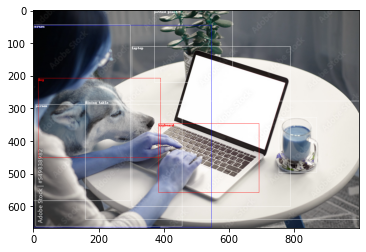

<Figure size 720x720 with 0 Axes>

In [10]:
image_path = "./data/human_dog_laptop.jpg"
result_image = detect_objects(image_path)
result_image = cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR)
plt.imshow(result_image,cmap='gray')
plt.figure(figsize=(10,10))
plt.show()

In [11]:
cv2.imshow("Result", result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()